# Análisis de datos

> *Versión preliminar*

Integrantes: 
  - Francisco Arenas
  - Sofía Rebolledo
  - Alvaro Romero

In [1]:
# FLAGS
FLAG_DATASET_DL = False

## Instalación de librerías e importación de datos

In [2]:
# Actualizar pip
%pip install --upgrade pip
# Instalar dependencias
%pip install numpy pandas matplotlib
# Dependencias para leer archivos Parquet
%pip install pyarrow fastparquet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar librerías
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear directorios
PATH_DATASETS = "datasets"
PATH_DATASETS_FOODCOM = os.path.join(PATH_DATASETS, "foodcom")
PATH_DATASETS_MEALRECPLUS = os.path.join(PATH_DATASETS, "mealrecplus")
PATH_DATASETS_NUTRIGREEN = os.path.join(PATH_DATASETS, "nutrigreen")
os.makedirs(PATH_DATASETS, exist_ok=True)

In [4]:
if FLAG_DATASET_DL:
  # Descargar "Recipes and Reviews" de Food.com
  os.system(f"curl -L -o {PATH_DATASETS_FOODCOM}.zip https://www.kaggle.com/api/v1/datasets/download/irkaal/foodcom-recipes-and-reviews")
  os.system(f"unzip -o {PATH_DATASETS_FOODCOM}.zip -d {PATH_DATASETS_FOODCOM}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_FOODCOM}.zip")

  # Cita: Dominio público (https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews)

In [5]:
if FLAG_DATASET_DL:
  # Descargar "MealRecPlus" de WUT-IDEA
  os.system(f"curl -L -o {PATH_DATASETS_MEALRECPLUS}.zip https://github.com/WUT-IDEA/MealRecPlus/archive/refs/heads/main.zip")
  os.system(f"unzip -o {PATH_DATASETS_MEALRECPLUS}.zip -d {PATH_DATASETS_MEALRECPLUS}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_MEALRECPLUS}.zip")
  # Cita: Ming Li, Lin Li, Xiaohui Tao, and Jimmy Xiangji Huang. 2024. MealRec+: A Meal Recommendation Dataset with Meal-Course Affiliation for Personal- ization and Healthiness. In Proceedings of the 47th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR ’24), July 14–18, 2024, Washington, DC, USA. ACM, New York, NY, USA, 11 pages. https://doi.org/10.1145/3626772.3657857 (https://github.com/WUT-IDEA/MealRecPlus)

In [6]:
if FLAG_DATASET_DL:
  # Descargar "NutriGreen Image Dataset" de NutriGreen
  os.system(f"curl -L -o {PATH_DATASETS_NUTRIGREEN}.zip https://zenodo.org/api/records/10020545/files-archive")
  os.system(f"unzip -o {PATH_DATASETS_NUTRIGREEN}.zip -d {PATH_DATASETS_NUTRIGREEN}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_NUTRIGREEN}.zip")
  # Cita: https://data.niaid.nih.gov/resources?id=zenodo_8374046

## Utilidades

## Análisis: foodcom

### Contexto

El conjunto de datos de recetas contiene 522,517 recetas de 312 categorías diferentes. Este conjunto proporciona información sobre cada receta, como tiempos de cocción, porciones, ingredientes, nutrición, instrucciones y más. El conjunto de datos de reseñas contiene 1,401,982 reseñas de 271,907 usuarios diferentes. Este conjunto proporciona información sobre el autor, la calificación, el texto de la reseña y más.

### Contenido
El conjunto de datos de recetas se proporciona en dos formatos diferentes:

- Se recomienda utilizar `recipes.parquet` y `reviews.parquet` ya que preservan el esquema de los datos originales. 
- `recipes.csv` está diseñado para ser analizado en R, mientras que `reviews.csv` no contiene columnas de listas, por lo que puede analizarse fácilmente.


In [7]:
# Cargamos primero las recetas
df_foodcom_recipes = pd.read_parquet(os.path.join(PATH_DATASETS_FOODCOM, "recipes.parquet"))
df_foodcom_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [8]:
# Cargamos ahora los reviews
df_foodcom_reviews = pd.read_parquet(os.path.join(PATH_DATASETS_FOODCOM, "reviews.parquet"))
df_foodcom_reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [10]:
df_foodcom_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


### Estadísticas de reviews (ratings)

In [12]:
# Función para generar estadísticas
def get_rating_stats(df: pd.DataFrame) -> pd.DataFrame:
  # Generamos estadísticas de ratings
  stats = {
    "Número de usuarios": round(df["AuthorId"].nunique(), 3),
    "Número de recetas": round(df["RecipeId"].nunique(), 3),
    "Número de ratings": round(df.shape[0], 3),
    "Rating promedio": round(df["Rating"].mean(), 3),
    "Desviación estándar de ratings": round(df["Rating"].std(), 3),
    "Rating mínimo": round(df["Rating"].min(), 3),
    "Rating máximo": round(df["Rating"].max(), 3),
    "Promedio de ratings por usuario": round(df.groupby("AuthorId")["Rating"].size().mean(), 3),
    "Promedio de ratings por receta": round(df.groupby("RecipeId")["Rating"].size().mean(), 3),
    "Desviación estándar de ratings por usuario": round(df.groupby("AuthorId")["Rating"].size().std(), 3),
    "Desviación estándar de ratings por receta": round(df.groupby("RecipeId")["Rating"].size().std(), 3),
    "Número de ratings por usuario (máximo)": round(df.groupby("AuthorId")["Rating"].size().max(), 3),
    "Número de ratings por usuario (mínimo)": round(df.groupby("AuthorId")["Rating"].size().min(), 3),
    "Número de ratings por receta (máximo)": round(df.groupby("RecipeId")["Rating"].size().max(), 3),
    "Número de ratings por receta (mínimo)": round(df.groupby("RecipeId")["Rating"].size().min(), 3),
    "Densidad de ratings (%)": round(100 * df.shape[0] / (df["AuthorId"].nunique() * df["RecipeId"].nunique()), 3),
  }
  stats_df = pd.DataFrame(stats, index=[0])
  stats_df = stats_df.transpose()
  stats_df.columns = ["Valor"]
  stats_df.index.name = "Estadística"
  
  return stats_df

# Generamos estadísticas de ratings
review_stats = get_rating_stats(df_foodcom_reviews)
review_stats

,Valor
Estadística,
Número de usuarios,271907.000
Número de recetas,271678.000
Número de ratings,1401982.000
Rating promedio,4.408
Desviación estándar de ratings,1.272
Rating mínimo,0.000
Rating máximo,5.000
Promedio de ratings por usuario,5.156
Promedio de ratings por receta,5.160


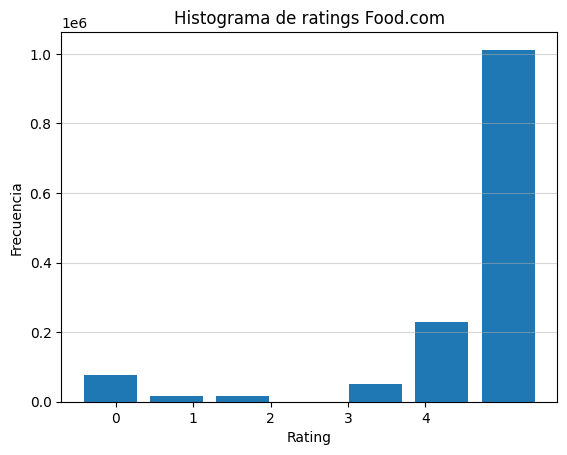

In [14]:
# Función para graficar ratings
def plot_ratings_hist(df: pd.DataFrame, title: str, dataset: str = None):
  plt.hist(df['Rating'], bins=7, range=(-0.5, 5.5), rwidth=0.8, align='mid')
  plt.title(title)
  plt.xticks(np.arange(0, 5, 1))
  plt.xlabel("Rating")
  plt.ylabel("Frecuencia")
  plt.grid(axis='y', alpha=0.5)
  if dataset:
    save_dir = os.path.join("output", dataset)
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, "ratings_hist.png"), dpi=300, bbox_inches='tight')
  plt.show()

# Graficamos ratings
plot_ratings_hist(df_foodcom_reviews, "Histograma de ratings Food.com", "foodcom")